### TypeClassification
DipタイプとTailCurrentタイプがそれぞれどのような条件下で生じるのかの考察

各タイプが生じているときとそうでないときの違いを磁場成分に注目して比較してみる　    
Bz成分の時間変化が大きく異なるはず...   
何を基準に違いを表す？
* 各点でのBz成分の時間変化の平均値？（全体で平均すると同じになるはず）
  
比較する領域
* Dip Type : 199と200の比較
depressionがない場合には，MLAT~0の前後10分間の領域を抽出してみる

In [2]:
import MDUS
from MDUS import Analysis
import numpy as np
import pandas as pd

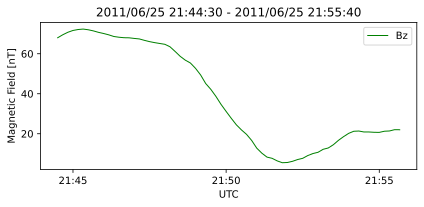

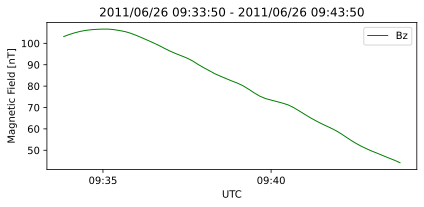

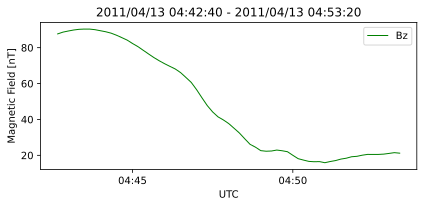

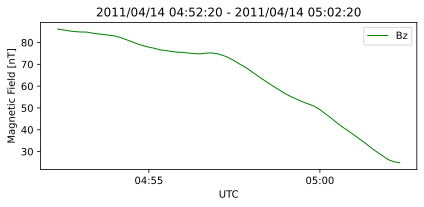

In [3]:
data_199 = MDUS.MagData()
data_200 = MDUS.MagData()
data_52 = MDUS.MagData()
data_54 = MDUS.MagData()

data_199.Input(orbit=199,sec=10)
data_200.Input(orbit=200,sec=10)
data_52.Input(orbit=52,sec=10)
data_54.Input(orbit=54,sec=10)

data_199.MoveAverage(window=13)
data_200.MoveAverage(window=13)
data_52.MoveAverage(window=13)
data_54.MoveAverage(window=13)
data_199.MLAT()
data_200.MLAT()
data_52.MLAT()
data_54.MLAT()

dt_199 = np.abs(data_199.value["MLAT"]).idxmin()
ds_199 = dt_199 + pd.Timedelta(minutes=-5)
de_199 = dt_199 + pd.Timedelta(minutes=5)

ds_199_dip = MDUS.dip.query('orbit == 199').values[0][0]
de_199_dip = MDUS.dip.query('orbit == 199').values[0][1]

ds_52_dip = MDUS.dip.query('orbit == 52').values[0][0]  
de_52_dip = MDUS.dip.query('orbit == 52').values[0][1]

dt_200 = np.abs(data_200.value["MLAT"]).idxmin()
ds_200 = dt_200 + pd.Timedelta(minutes=-5)
de_200 = dt_200 + pd.Timedelta(minutes=5)

dt_54 = np.abs(data_54.value["MLAT"]).idxmin()
ds_54 = dt_54 + pd.Timedelta(minutes=-5)
de_54 = dt_54 + pd.Timedelta(minutes=5)

# fig, ax = data_199.Plot(ds=ds_199,de=de_199,fsize=(6,3),component=["Bz"])
fig, ax = data_199.Plot(ds=ds_199_dip,de=de_199_dip,fsize=(6,3),component=["Bz"],filename='Bz_199')
fig, ax = data_200.Plot(ds=ds_200,de=de_200,fsize=(6,3),component=["Bz"],filename='Bz_200') 

fig, ax = data_52.Plot(ds=ds_52_dip,de=de_52_dip,fsize=(6,3),component=["Bz"],filename='Bz_52')
fig, ax = data_54.Plot(ds=ds_54,de=de_54,fsize=(6,3),component=["Bz"],filename='Bz_54')

(<Figure size 900x300 with 1 Axes>,
 <Axes: title={'center': '2011/04/14 04:24:10 - 2011/04/14 05:35:20'}, xlabel='UTC', ylabel='Magnetic Field [nT]'>)

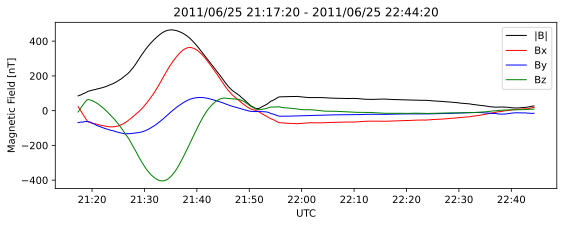

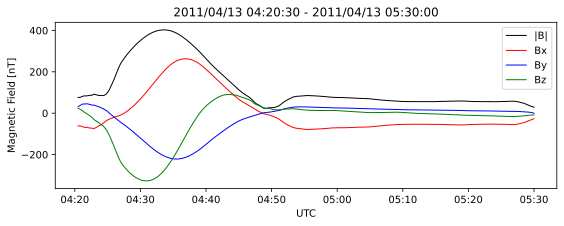

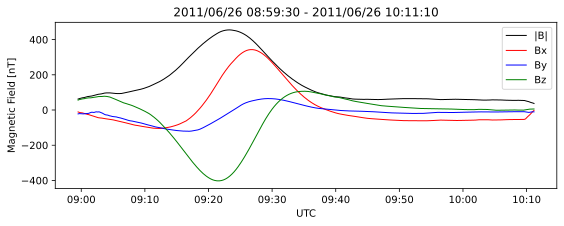

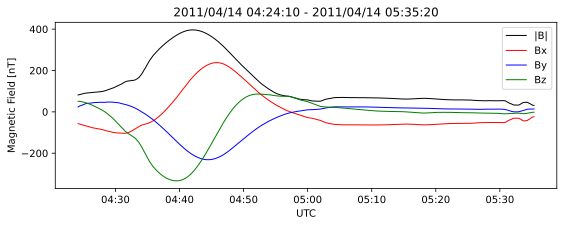

In [4]:
data_199.Plot()
data_52.Plot()
data_200.Plot()
data_54.Plot()

In [5]:
# Bz成分の最大値・最小値を取得してみる
print("orbit 199 (with dip)")
print(data_199.value.query("@ds_199_dip <= index <= @de_199_dip")["Bz"].max())
print(data_199.value.query("@ds_199_dip <= index <= @de_199_dip")["Bz"].min())
print()
print("orbit 52 (with dip)")
print(data_52.value.query("@ds_52_dip <= index <= @de_52_dip")["Bz"].max())
print(data_52.value.query("@ds_52_dip <= index <= @de_52_dip")["Bz"].min())
print()
print("orbit 200 (without dip)")
print(data_200.value.query("@ds_200 <= index <= @de_200")["Bz"].max())
print(data_200.value.query("@ds_200 <= index <= @de_200")["Bz"].min())
print()
print("orbit 54 (without dip)")
print(data_54.value.query("@ds_54 <= index <= @de_54")["Bz"].max())
print(data_54.value.query("@ds_54 <= index <= @de_54")["Bz"].min())

orbit 199 (with dip)
72.34915384615384
5.489153846153847

orbit 52 (with dip)
90.37653846153847
15.871384615384619

orbit 200 (without dip)
106.67830769230768
44.17446153846154

orbit 54 (without dip)
86.1866923076923
24.872153846153847


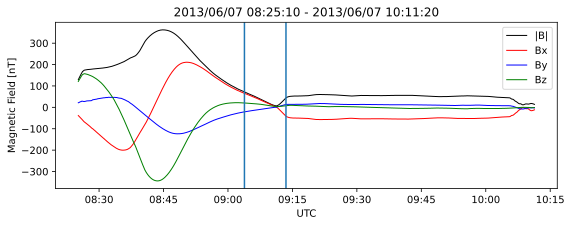

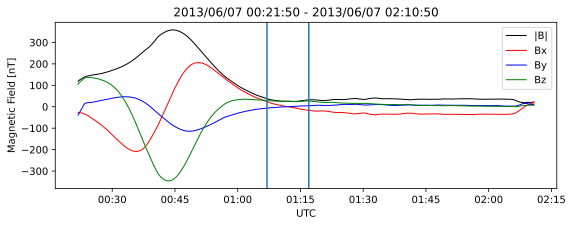

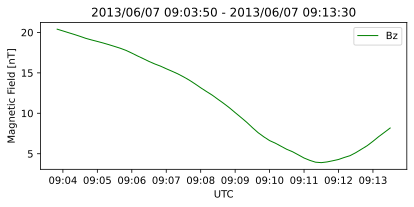

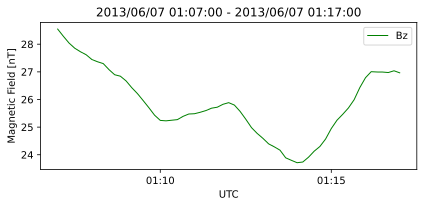

In [33]:
data_2048 = MDUS.MagData()
data_2047 = MDUS.MagData()
data_2048.Input(orbit=2048,sec=10)
data_2047.Input(orbit=2047,sec=10)

data_2048.MoveAverage(window=13)
data_2047.MoveAverage(window=13)
data_2048.MLAT()
data_2047.MLAT()

ds_2048 = MDUS.dip.query('orbit == 2048').values[0][0]
de_2048 = MDUS.dip.query('orbit == 2048').values[0][1]

dt_2047 = np.abs(data_2047.value.query('X_MSO <= 0')["MLAT"]).idxmin()
ds_2047 = dt_2047 + pd.Timedelta(minutes=-5)
de_2047 = dt_2047 + pd.Timedelta(minutes=5)

fig, ax = data_2048.Plot()
ax.axvline(ds_2048)
ax.axvline(de_2048)
fig, ax = data_2047.Plot()
ax.axvline(ds_2047)
ax.axvline(de_2047)

fig, ax = data_2048.Plot(ds=ds_2048,de=de_2048,fsize=(6,3),component=["Bz"],filename='Bz_2048')
fig, ax = data_2047.Plot(ds=ds_2047,de=de_2047,fsize=(6,3),component=["Bz"],filename='Bz_2047')

In [34]:
print("orbit 2048 (with dip)")
print(data_2048.value.query("@ds_2048 <= index <= @de_2048")["Bz"].max())
print(data_2048.value.query("@ds_2048 <= index <= @de_2048")["Bz"].min())
print()
print("orbit 2047 (without dip)")
print(data_2047.value.query("@ds_2047 <= index <= @de_2047")["Bz"].max())
print(data_2047.value.query("@ds_2047 <= index <= @de_2047")["Bz"].min())

orbit 2048 (with dip)
20.405
3.8976153846153845

orbit 2047 (without dip)
28.548153846153845
23.71153846153846


In [43]:
# 時間変動の計算
# 199
dt_199_max = data_199.value.query("@ds_199_dip <= index <= @de_199_dip")["Bz"].idxmax()
dt_199_min = data_199.value.query("@ds_199_dip <= index <= @de_199_dip")["Bz"].idxmin()
Bz_199_max = data_199.value.query("@ds_199_dip <= index <= @de_199_dip")["Bz"].max()
Bz_199_min = data_199.value.query("@ds_199_dip <= index <= @de_199_dip")["Bz"].min()
print(199)
print((Bz_199_max - Bz_199_min) / (dt_199_max - dt_199_min).total_seconds())
print((dt_199_max - dt_199_min).total_seconds())
print()
# 200
dt_200_max = data_200.value.query("@ds_200 <= index <= @de_200")["Bz"].idxmax()
dt_200_min = data_200.value.query("@ds_200 <= index <= @de_200")["Bz"].idxmin()
Bz_200_max = data_200.value.query("@ds_200 <= index <= @de_200")["Bz"].max()
Bz_200_min = data_200.value.query("@ds_200 <= index <= @de_200")["Bz"].min()
print(200)
print((Bz_200_max - Bz_200_min) / (dt_200_max - dt_200_min).total_seconds())
print((dt_200_max - dt_200_min).total_seconds())
print()
# 52
dt_52_max = data_52.value.query("@ds_52_dip <= index <= @de_52_dip")["Bz"].idxmax()
dt_52_min = data_52.value.query("@ds_52_dip <= index <= @de_52_dip")["Bz"].idxmin()
Bz_52_max = data_52.value.query("@ds_52_dip <= index <= @de_52_dip")["Bz"].max()
Bz_52_min = data_52.value.query("@ds_52_dip <= index <= @de_52_dip")["Bz"].min()
print(52)
print((Bz_52_max - Bz_52_min) / (dt_52_max - dt_52_min).total_seconds())
print((dt_52_max - dt_52_min).total_seconds())
print()
# 54
dt_54_max = data_54.value.query("@ds_54 <= index <= @de_54")["Bz"].idxmax()
dt_54_min = data_54.value.query("@ds_54 <= index <= @de_54")["Bz"].idxmin()
Bz_54_max = data_54.value.query("@ds_54 <= index <= @de_54")["Bz"].max()
Bz_54_min = data_54.value.query("@ds_54 <= index <= @de_54")["Bz"].min()
print(54)
print((Bz_54_max - Bz_54_min) / (dt_54_max - dt_54_min).total_seconds())
print((dt_54_max - dt_54_min).total_seconds())
print()

# 2048
dt_2048_max = data_2048.value.query("@ds_2048 <= index <= @de_2048")["Bz"].idxmax()
dt_2048_min = data_2048.value.query("@ds_2048 <= index <= @de_2048")["Bz"].idxmin()
Bz_2048_max = data_2048.value.query("@ds_2048 <= index <= @de_2048")["Bz"].max()
Bz_2048_min = data_2048.value.query("@ds_2048 <= index <= @de_2048")["Bz"].min()
print(2048)
print((Bz_2048_max - Bz_2048_min) / (dt_2048_max - dt_2048_min).total_seconds())
print((dt_2048_max - dt_2048_min).total_seconds())
print()
# 2047
dt_2047_max = data_2047.value.query("@ds_2047 <= index <= @de_2047")["Bz"].idxmax()
dt_2047_min = data_2047.value.query("@ds_2047 <= index <= @de_2047")["Bz"].idxmin()
Bz_2047_max = data_2047.value.query("@ds_2047 <= index <= @de_2047")["Bz"].max()
Bz_2047_min = data_2047.value.query("@ds_2047 <= index <= @de_2047")["Bz"].min()
print(2047)
print((Bz_2047_max - Bz_2047_min) / (dt_2047_max - dt_2047_min).total_seconds())
print((dt_2047_max - dt_2047_min).total_seconds())
print()


199
-0.1714358974358974
-390.0

200
-0.11793178519593611
-530.0

52
-0.16556700854700857
-450.0

54
-0.10219089743589742
-600.0

2048
-0.03588561872909699
-460.0

2047
-0.011515750915750916
-420.0

